In [226]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.ticker

### How many people should you interview to fill `n` roles?

Say 50% of people you interview are hireable (meet the requirements, make it over the bar, etc.).

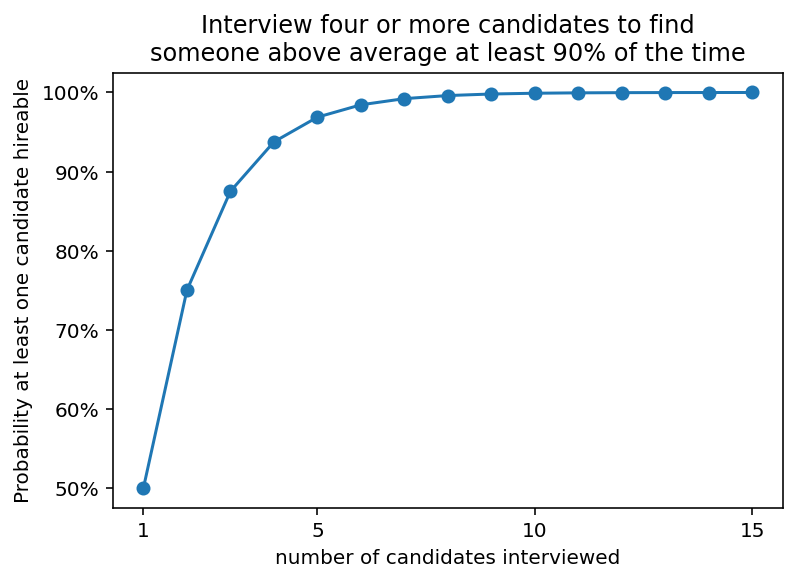

[(1, 0.5), (2, 0.75), (3, 0.875), (4, 0.9375), (5, 0.96875), (6, 0.984375)]

In [231]:
p_hire = 0.5
probs = [1 - (1 - p_hire)**panel_n for panel_n in range(1, 15 + 1)]
plt.plot(probs, '-o')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(decimals=0, xmax=1))
plt.xticks([0, 4, 9, 14], [1, 5, 10, 15])
plt.xlabel('number of candidates interviewed')
plt.ylabel(f'Probability at least one candidate hireable')
plt.title('Interview four or more candidates to find\n'
          'someone above average at least 90% of the time')
plt.show()
list(zip(range(1, 7), probs))

In [232]:
def min_candidates(roles_n, p_hire=0.5, confidence=0.9):
    """Number of people to interview to ensure confidence of finding roles_n hireable"""
    candidates_n = roles_n
    while True:
        if 1 - scipy.stats.binom(n=candidates_n, p=p_hire).cdf(roles_n - 1) >= confidence:
            return candidates_n
        candidates_n += 1

In [233]:
pd.DataFrame([(roles_n,
               min_candidates(roles_n, confidence=0.9),
               min_candidates(roles_n, confidence=0.95),
               min_candidates(roles_n, confidence=0.97))
              for roles_n in range(1, 101)],
            columns=['number of roles',
                     'candidates for 90% confidence',
                     'candidates for 95% confidence',
                     'candidates for 97% confidence'])

,number of roles,candidates for 90% confidence,candidates for 95% confidence,candidates for 97% confidence
0,1,4,5,6
1,2,7,8,9
2,3,9,11,12
3,4,12,13,14
4,5,14,16,17
...,...,...,...,...
95,96,210,216,219
96,97,212,218,221
97,98,214,220,224
98,99,216,222,226


In [217]:
min_candidates(9)

24

In [210]:
confidence = 0.9
p_hire = 0.5
max_panel_n = 100
max_roles_n = 20

panel_ns = []
for roles_n in range(1, max_roles_n + 1):
    probs = [1 - scipy.stats.binom(n=panel_n, p=p_hire).cdf(roles_n - 1)
             for panel_n in range(1, max_panel_n + 1)]
    panel_n = [prob >= confidence for prob in probs].index(True) + 1
    panel_ns.append(panel_n)

list(zip(range(1, max_roles_n + 1), panel_ns))

[(1, 4),
 (2, 7),
 (3, 9),
 (4, 12),
 (5, 14),
 (6, 17),
 (7, 19),
 (8, 21),
 (9, 24),
 (10, 26),
 (11, 28),
 (12, 31),
 (13, 33),
 (14, 35),
 (15, 37),
 (16, 39),
 (17, 42),
 (18, 44),
 (19, 46),
 (20, 48)]

In [212]:
confidence = 0.95
p_hire = 0.5
max_panel_n = 100
max_roles_n = 20

panel_ns = []
for roles_n in range(1, max_roles_n + 1):
    probs = [1 - scipy.stats.binom(n=panel_n, p=p_hire).cdf(roles_n - 1)
             for panel_n in range(1, max_panel_n + 1)]
    panel_n = [prob >= confidence for prob in probs].index(True) + 1
    panel_ns.append(panel_n)

list(zip(range(1, max_roles_n + 1), panel_ns))

[(1, 5),
 (2, 8),
 (3, 11),
 (4, 13),
 (5, 16),
 (6, 18),
 (7, 21),
 (8, 23),
 (9, 26),
 (10, 28),
 (11, 30),
 (12, 33),
 (13, 35),
 (14, 37),
 (15, 40),
 (16, 42),
 (17, 44),
 (18, 47),
 (19, 49),
 (20, 51)]

In [213]:
confidence = 0.97
p_hire = 0.5
max_panel_n = 100
max_roles_n = 20

panel_ns = []
for roles_n in range(1, max_roles_n + 1):
    probs = [1 - scipy.stats.binom(n=panel_n, p=p_hire).cdf(roles_n - 1)
             for panel_n in range(1, max_panel_n + 1)]
    panel_n = [prob >= confidence for prob in probs].index(True) + 1
    panel_ns.append(panel_n)

list(zip(range(1, max_roles_n + 1), panel_ns))

[(1, 6),
 (2, 9),
 (3, 12),
 (4, 14),
 (5, 17),
 (6, 20),
 (7, 22),
 (8, 25),
 (9, 27),
 (10, 30),
 (11, 32),
 (12, 34),
 (13, 37),
 (14, 39),
 (15, 41),
 (16, 44),
 (17, 46),
 (18, 48),
 (19, 51),
 (20, 53)]

In [194]:
x.cdf(1)

0.1875

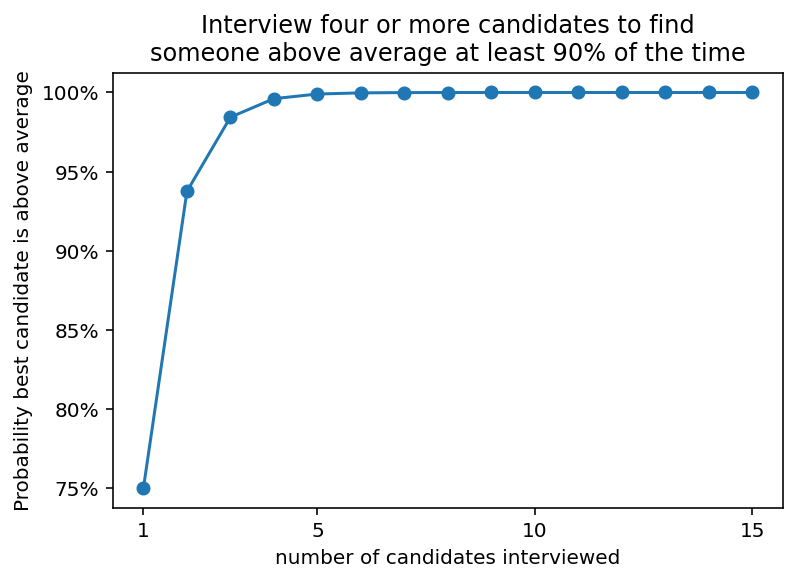

[(1, 0.75),
 (2, 0.9375),
 (3, 0.984375),
 (4, 0.99609375),
 (5, 0.9990234375),
 (6, 0.999755859375)]

In [187]:
probability = 0.75
max_panel_n = 15
probs = [1 - (1 - probability)**panel_n for panel_n in range(1, max_panel_n + 1)]
plt.plot(probs, '-o')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(decimals=0, xmax=1))
plt.xticks([0, 4, 9, 14], [1, 5, 10, 15])
plt.xlabel('number of candidates interviewed')
plt.ylabel(f'Probability best candidate is above average')
plt.title('Interview four or more candidates to find\n'
          'someone above average at least 90% of the time')
plt.show()
list(zip(range(1, 7), probs))

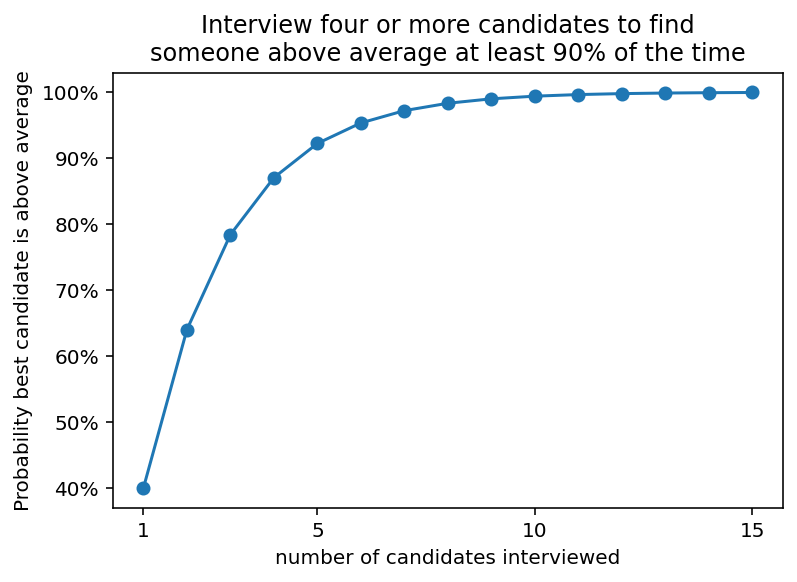

[(1, 0.4),
 (2, 0.64),
 (3, 0.784),
 (4, 0.8704000000000001),
 (5, 0.9222400000000001),
 (6, 0.953344)]

In [188]:
probability = 0.4
max_panel_n = 15
probs = [1 - (1 - probability)**panel_n for panel_n in range(1, max_panel_n + 1)]
plt.plot(probs, '-o')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(decimals=0, xmax=1))
plt.xticks([0, 4, 9, 14], [1, 5, 10, 15])
plt.xlabel('number of candidates interviewed')
plt.ylabel(f'Probability best candidate is above average')
plt.title('Interview four or more candidates to find\n'
          'someone above average at least 90% of the time')
plt.show()
list(zip(range(1, 7), probs))

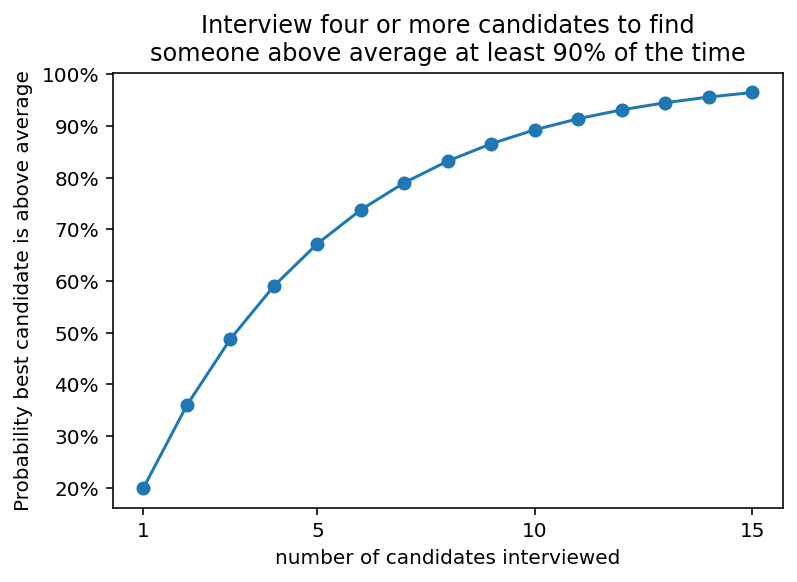

[(1, 0.19999999999999996),
 (2, 0.3599999999999999),
 (3, 0.4879999999999999),
 (4, 0.5903999999999999),
 (5, 0.6723199999999999),
 (6, 0.7378559999999998)]

In [189]:
probability = 0.2
max_panel_n = 15
probs = [1 - (1 - probability)**panel_n for panel_n in range(1, max_panel_n + 1)]
plt.plot(probs, '-o')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(decimals=0, xmax=1))
plt.xticks([0, 4, 9, 14], [1, 5, 10, 15])
plt.xlabel('number of candidates interviewed')
plt.ylabel(f'Probability best candidate is above average')
plt.title('Interview four or more candidates to find\n'
          'someone above average at least 90% of the time')
plt.show()
list(zip(range(1, 7), probs))

In [183]:
rng = np.random.default_rng(0)
n_simulations = 10_000
max_panel_n = 20
panels = rng.normal(size=(n_simulations, max_panel_n))

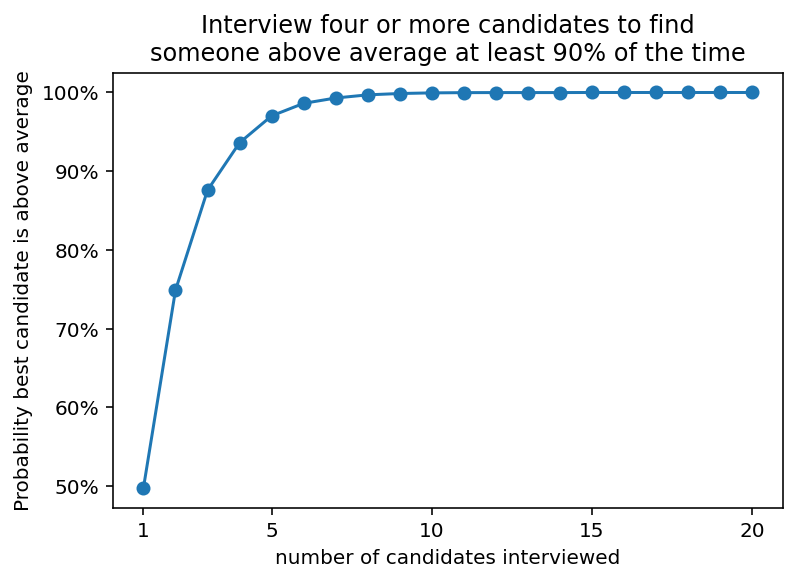

[(1, 0.4978), (2, 0.7489), (3, 0.8759), (4, 0.9362), (5, 0.9703), (6, 0.9862)]

In [86]:
threshold = 0.0
probs = [(panels[:, :n].max(axis=1) > threshold).mean() for n in range(1, max_panel_n + 1)]
plt.plot(probs, '-o')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(decimals=0, xmax=1))
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('number of candidates interviewed')
plt.ylabel(f'Probability best candidate is above average')
plt.title('Interview four or more candidates to find\n'
          'someone above average at least 90% of the time')
plt.show()
list(zip(range(1, 7), probs))

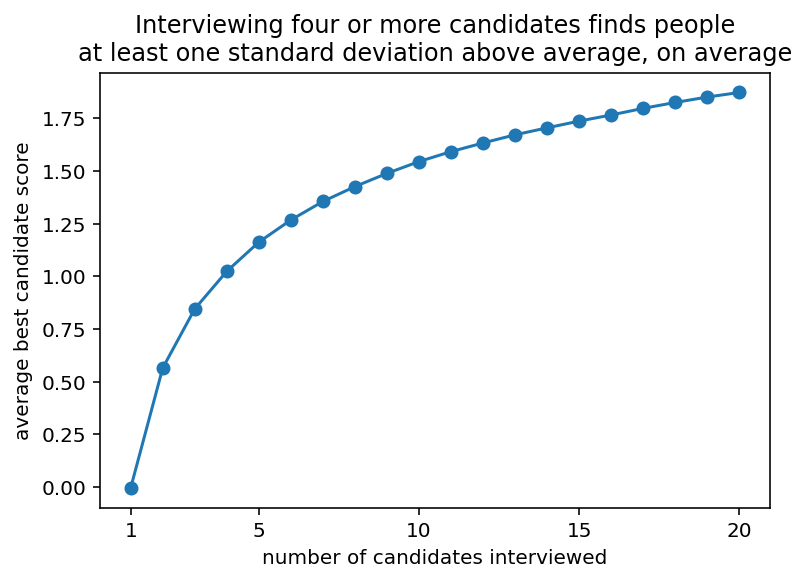

[(1, -0.003007535657406412),
 (2, 0.5654200188762174),
 (3, 0.8456332261676193),
 (4, 1.0236917620831292),
 (5, 1.162094011253132),
 (6, 1.2670428017342177)]

In [161]:
means = [panels[:, :n].max(axis=1).mean() for n in range(1, max_panel_n + 1)]
plt.plot(means, '-o')
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('number of candidates interviewed')
plt.ylabel('average best candidate score')
plt.title('Interviewing four or more candidates finds people\n'
          'at least one standard deviation above average, on average')
plt.show()
list(zip(range(1, 7), means))

This seems like a good pair of heuristics:

 * We want at least 90% chance of getting people who are above average.
 * We want our people to score 1+ on average.

We can look at what we need to do to satisfy each of these and see what they imply.

In [163]:
rng = np.random.default_rng(0)
n_simulations = 10_000
max_panel_n = 100
panels = rng.normal(size=(n_simulations, max_panel_n))
max_roles = 20

In [178]:
# Want 90% chance that all hires are above average
probability = 0.9
threshold = 0.0

min_candidates = []
for n_roles in range(1, max_roles + 1):
    probs = []
    for n in range(1, max_panel_n + 1):
        try:
            probs.append((np.sort(panels[:, :n], axis=1)[:, -n_roles:] > threshold).mean())
        except IndexError:
            probs.append(0.0)
    min_candidates.append([prob > probability for prob in probs].index(True) + 1)

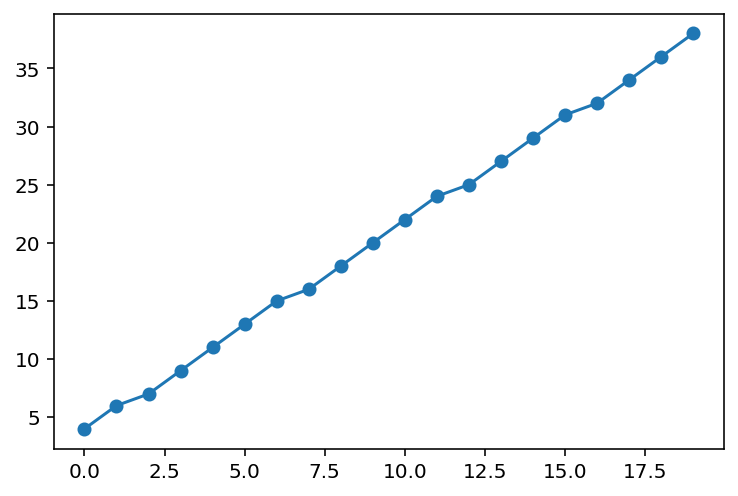

In [179]:
plt.plot(min_candidates, '-o')

In [180]:
min_candidates

[4, 6, 7, 9, 11, 13, 15, 16, 18, 20, 22, 24, 25, 27, 29, 31, 32, 34, 36, 38]

In [181]:
[n_candidates / n_roles for n_candidates, n_roles in zip(min_candidates, range(1, max_roles + 1))]

[4.0,
 3.0,
 2.3333333333333335,
 2.25,
 2.2,
 2.1666666666666665,
 2.142857142857143,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.9230769230769231,
 1.9285714285714286,
 1.9333333333333333,
 1.9375,
 1.8823529411764706,
 1.8888888888888888,
 1.894736842105263,
 1.9]

In [147]:
# Want average hire to score over 1.0 on average
threshold = 1.0

min_candidates = []
for n_roles in range(1, max_roles + 1):
    scores = []
    for n in range(1, max_panel_n + 1):
        try:
            scores.append(np.sort(panels[:, :n], axis=1)[:, -n_roles:].mean())
        except IndexError:
            scores.append(0.0)
    min_candidates.append([score > threshold for score in scores].index(True) + 1)

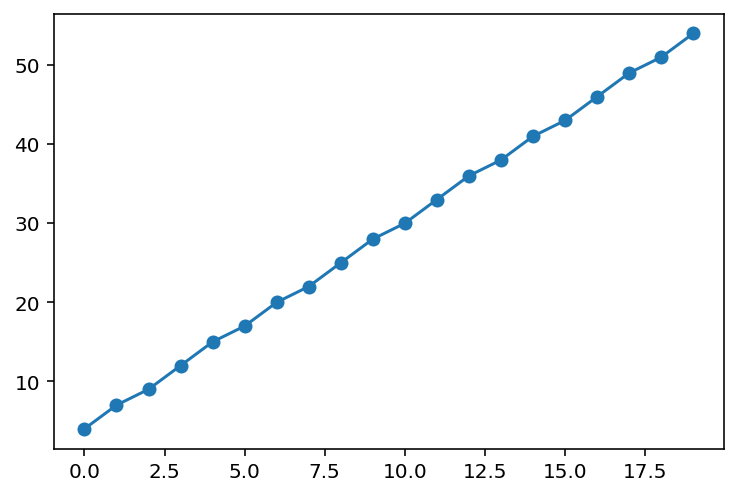

In [148]:
plt.plot(min_candidates, '-o')

In [149]:
min_candidates

[4, 7, 9, 12, 15, 17, 20, 22, 25, 28, 30, 33, 36, 38, 41, 43, 46, 49, 51, 54]

In [150]:
[n_candidates / n_roles for n_candidates, n_roles in zip(min_candidates, range(1, max_roles + 1))]

[4.0,
 3.5,
 3.0,
 3.0,
 3.0,
 2.8333333333333335,
 2.857142857142857,
 2.75,
 2.7777777777777777,
 2.8,
 2.727272727272727,
 2.75,
 2.769230769230769,
 2.7142857142857144,
 2.7333333333333334,
 2.6875,
 2.7058823529411766,
 2.7222222222222223,
 2.6842105263157894,
 2.7]

In [164]:
# What if we want average hire to score over 1.25 on average
threshold = 1.25

min_candidates = []
for n_roles in range(1, max_roles + 1):
    scores = []
    for n in range(1, max_panel_n + 1):
        try:
            scores.append(np.sort(panels[:, :n], axis=1)[:, -n_roles:].mean())
        except IndexError:
            scores.append(0.0)
    min_candidates.append([score > threshold for score in scores].index(True) + 1)

In [165]:
[n_candidates / n_roles for n_candidates, n_roles in zip(min_candidates, range(1, max_roles + 1))]

[6.0,
 5.0,
 4.666666666666667,
 4.5,
 4.2,
 4.166666666666667,
 4.142857142857143,
 4.125,
 4.111111111111111,
 4.1,
 4.090909090909091,
 4.083333333333333,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.9473684210526314,
 3.95]

In [166]:
min_candidates

[6, 10, 14, 18, 21, 25, 29, 33, 37, 41, 45, 49, 52, 56, 60, 64, 68, 72, 75, 79]

In [171]:
# What if we want 95% chance that all hires are above average?
probability = 0.95
threshold = 0.0

min_candidates = []
for n_roles in range(1, max_roles + 1):
    probs = []
    for n in range(1, max_panel_n + 1):
        try:
            probs.append((np.sort(panels[:, :n], axis=1)[:, -n_roles:] > threshold).mean())
        except IndexError:
            probs.append(0.0)
    min_candidates.append([prob > probability for prob in probs].index(True) + 1)

In [173]:
[n_candidates / n_roles for n_candidates, n_roles in zip(min_candidates, range(1, max_roles + 1))]

[5.0,
 3.5,
 3.0,
 2.75,
 2.6,
 2.5,
 2.4285714285714284,
 2.375,
 2.3333333333333335,
 2.3,
 2.1818181818181817,
 2.1666666666666665,
 2.1538461538461537,
 2.142857142857143,
 2.1333333333333333,
 2.125,
 2.1176470588235294,
 2.111111111111111,
 2.1052631578947367,
 2.1]

In [172]:
min_candidates

[5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42]

In [174]:
# What if we want 97% chance that all hires are above average?
probability = 0.97
threshold = 0.0

min_candidates = []
for n_roles in range(1, max_roles + 1):
    probs = []
    for n in range(1, max_panel_n + 1):
        try:
            probs.append((np.sort(panels[:, :n], axis=1)[:, -n_roles:] > threshold).mean())
        except IndexError:
            probs.append(0.0)
    min_candidates.append([prob > probability for prob in probs].index(True) + 1)

In [176]:
[n_candidates / n_roles for n_candidates, n_roles in zip(min_candidates, range(1, max_roles + 1))]

[6.0,
 4.0,
 3.3333333333333335,
 3.0,
 2.8,
 2.6666666666666665,
 2.5714285714285716,
 2.5,
 2.4444444444444446,
 2.4,
 2.3636363636363638,
 2.3333333333333335,
 2.3076923076923075,
 2.2857142857142856,
 2.2666666666666666,
 2.25,
 2.235294117647059,
 2.2222222222222223,
 2.210526315789474,
 2.2]

In [175]:
min_candidates

[6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44]

In [146]:
np.sort(panels[:, :100], axis=1)[:, -20:].mean()

1.3872436206991077

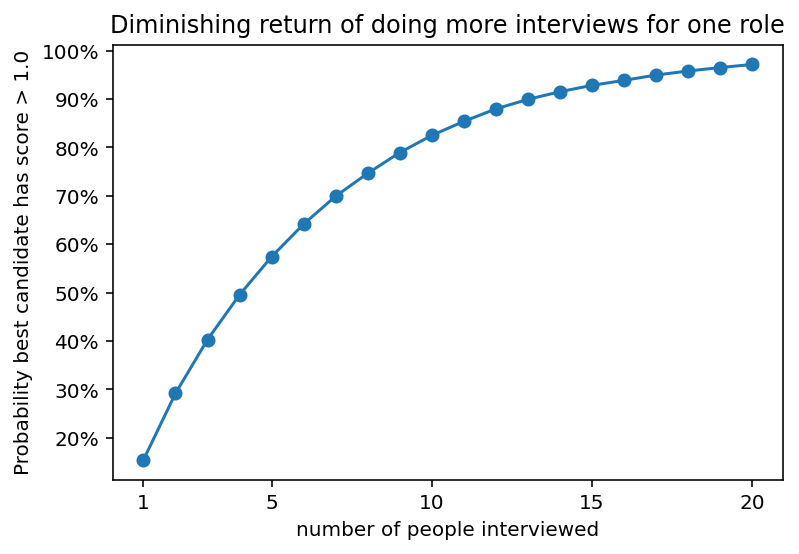

In [43]:
threshold = 1.0
probs = [(panels[:, :n].max(axis=1) > threshold).mean() for n in range(1, max_panel_n + 1)]
plt.plot(probs, '-o')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(decimals=0, xmax=1))
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('number of people interviewed')
plt.ylabel(f'Probability best candidate has score > {threshold}')
plt.title('Diminishing return of doing more interviews for one role')
plt.show()

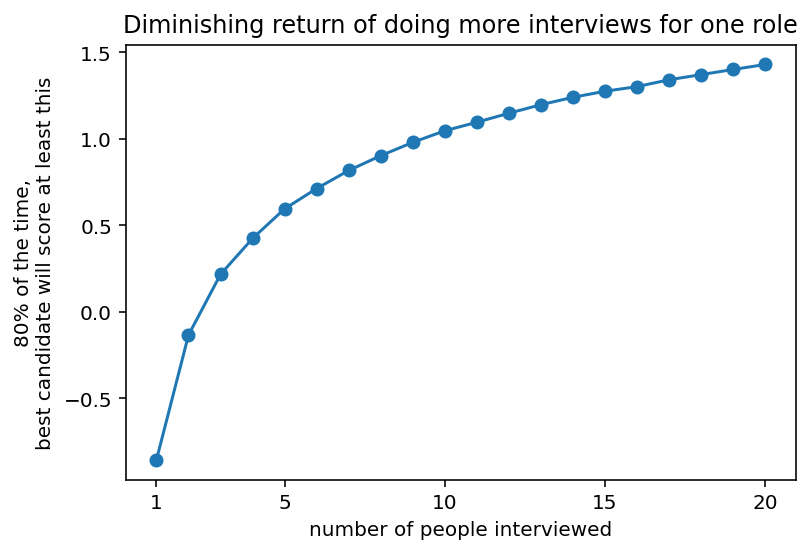

In [60]:
probability = 0.8
thresholds = [np.quantile(panels[:, :n].max(axis=1), 1 - probability) for n in range(1, max_panel_n + 1)]
plt.plot(thresholds, '-o')
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('number of people interviewed')
plt.ylabel(f'{round(100 * probability)}% of the time,\nbest candidate will score at least this')
plt.title('Diminishing return of doing more interviews for one role')
plt.show()
# Need 3 candidates to have 80% confidence of getting someone above average

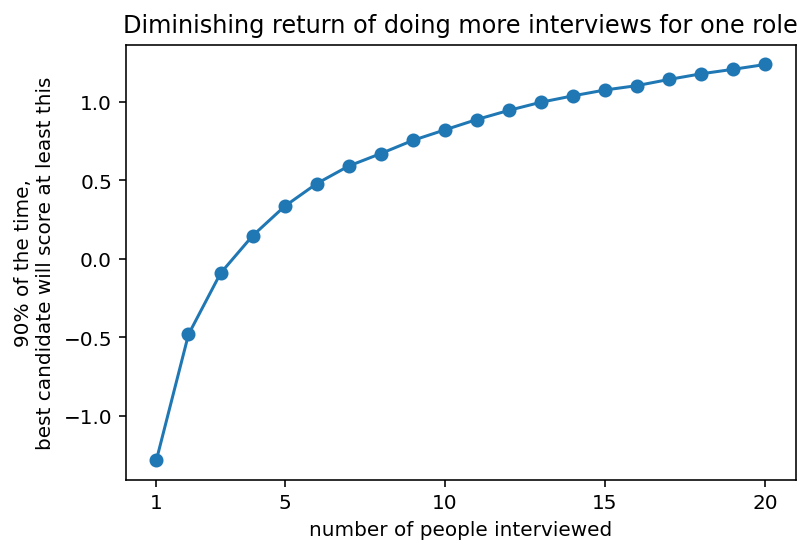

In [61]:
probability = 0.9
thresholds = [np.quantile(panels[:, :n].max(axis=1), 1 - probability) for n in range(1, max_panel_n + 1)]
plt.plot(thresholds, '-o')
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('number of people interviewed')
plt.ylabel(f'{round(100 * probability)}% of the time,\nbest candidate will score at least this')
plt.title('Diminishing return of doing more interviews for one role')
plt.show()
# Need 4 candidates to have 90% confidence of getting someone above average

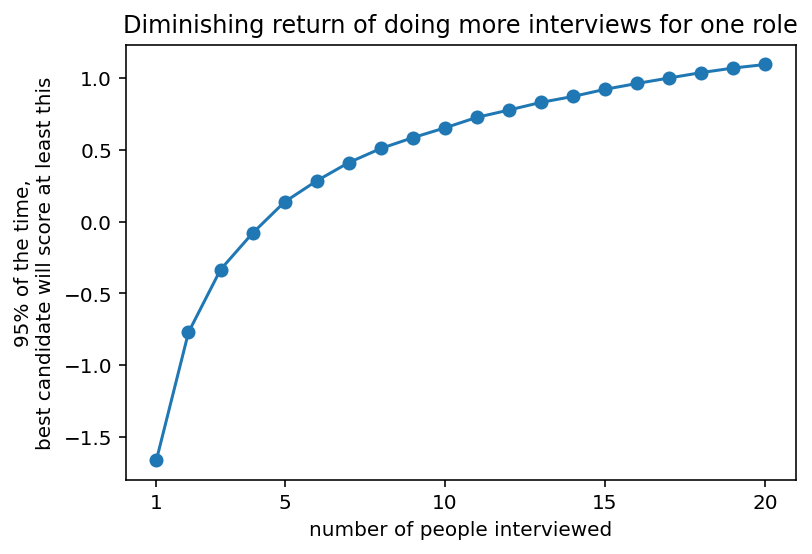

In [63]:
probability = 0.95
thresholds = [np.quantile(panels[:, :n].max(axis=1), 1 - probability) for n in range(1, max_panel_n + 1)]
plt.plot(thresholds, '-o')
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('number of people interviewed')
plt.ylabel(f'{round(100 * probability)}% of the time,\nbest candidate will score at least this')
plt.title('Diminishing return of doing more interviews for one role')
plt.show()
# Need 5 candidates to have 95% confidence of getting someone above average

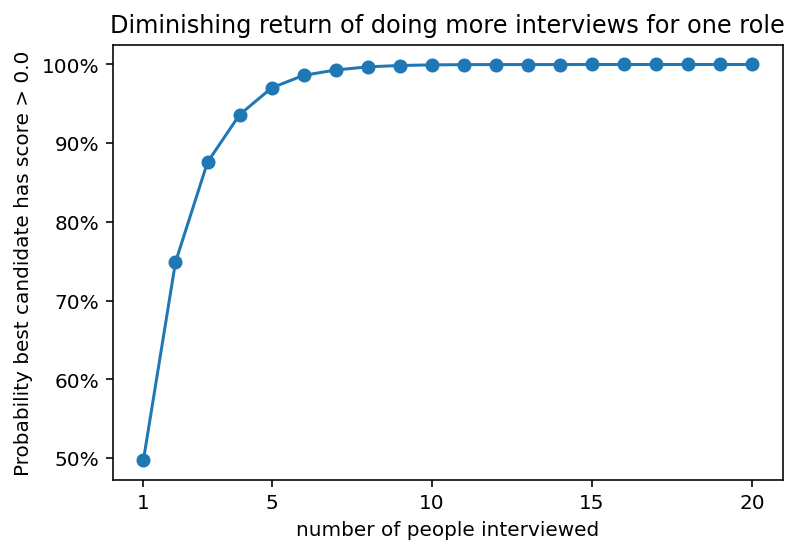

In [67]:
threshold = 0.0
probs = [(panels[:, :n].max(axis=1) > threshold).mean() for n in range(1, max_panel_n + 1)]
plt.plot(probs, '-o')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(decimals=0, xmax=1))
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('number of people interviewed')
plt.ylabel(f'Probability best candidate has score > {threshold}')
plt.title('Diminishing return of doing more interviews for one role')
plt.show()

In [21]:
means = best_of_3.mean(), best_of_4.mean(), best_of_5.mean(), best_of_6.mean()
means

(0.8482395925682111,
 1.0285340860596799,
 1.1662592986562137,
 1.2698045677673526)

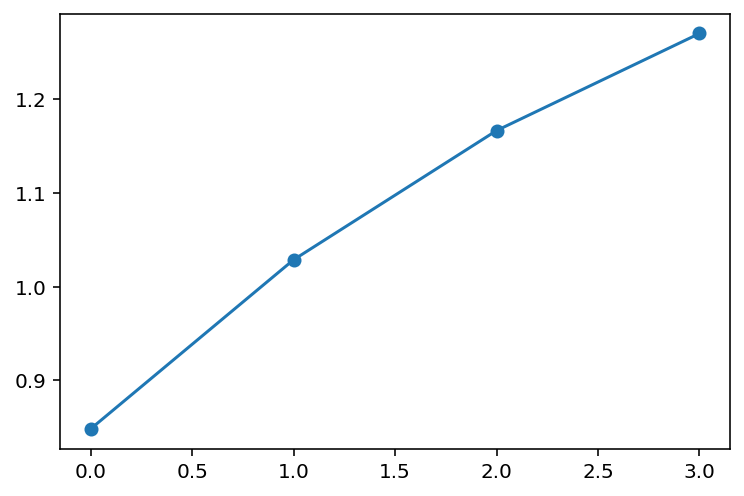

In [23]:
plt.plot(means, '-o')

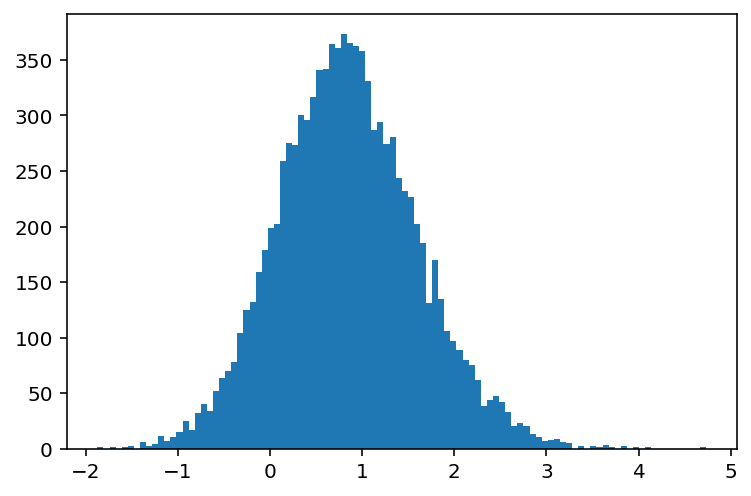

In [15]:
_ = plt.hist(best_of_3, bins=100)

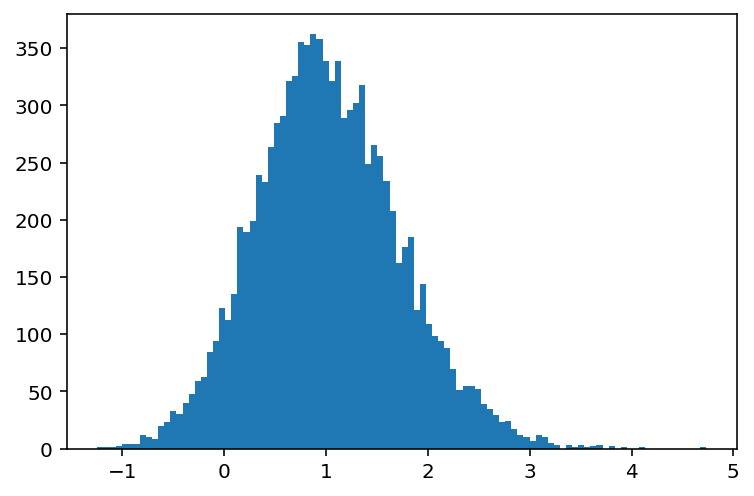

In [17]:
_ = plt.hist(best_of_4, bins=100)

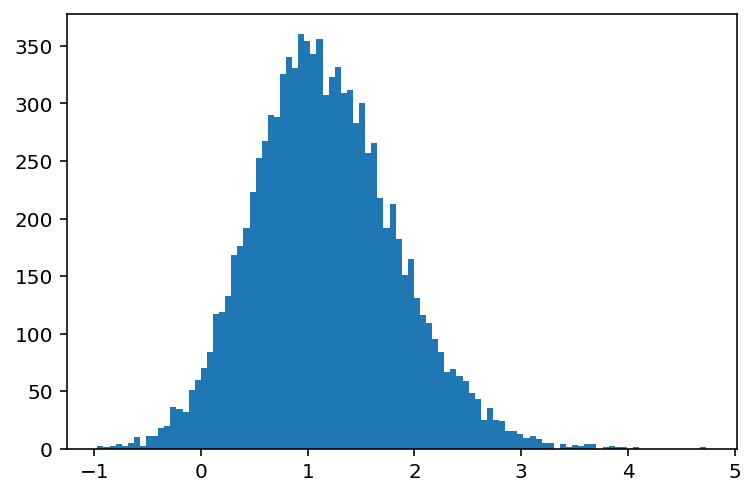

In [18]:
_ = plt.hist(best_of_5, bins=100)

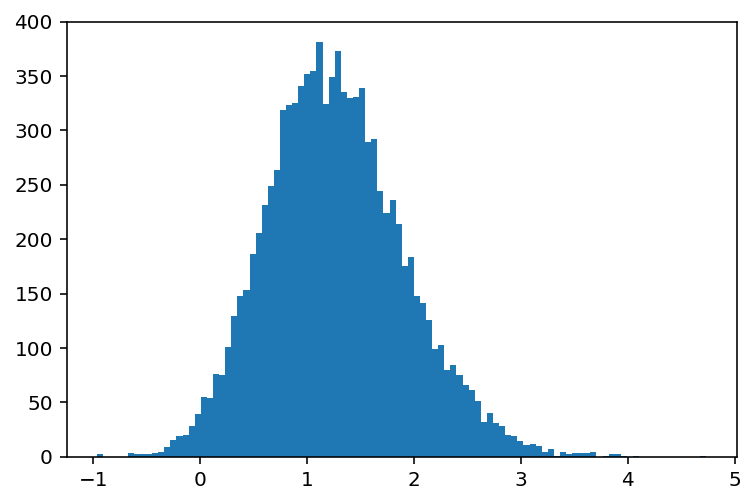

In [19]:
_ = plt.hist(best_of_6, bins=100)